

---


###### **Contexto e objetivo:** 
**Este conjunto de dados contem empresas, cargos, frequencia de salários reportados, localização e o valor salário de profissionais que operam na área de análise de dados. O objetivo  é estruturar as informações e analisarmos sem equivocos. Plotar gráficos e analisar de forma descritiva.**


---




### Importanto as bibliotecas necessárias

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib as plt

### Importando o dataset

In [ ]:
dadosOriginal = pd.read_csv('SalaryDataset.csv')
dados = dadosOriginal.copy()

### Visualizando o dataset
---
https://www.kaggle.com/iamsouravbanerjee/analytics-industry-salaries-2022-india



In [ ]:
dados.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


### Conhecendo estrutura de dados, e cortando valores nulos

In [ ]:
# Dimenssão e valores nulos
print('Numero de linhas e colunas',dados.shape)
print('Numero de valores nulos', dados.isna().sum().sum())

Number of rows and columns (4344, 5)
Number of null values 5


In [ ]:
dados.isna().sum()

Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

In [ ]:
# Cortando as linhas que contem valores nulos
dados = dados.dropna()
print('Number of null values', dados.isna().sum().sum())

Number of null values 0


In [ ]:
# Dentre os salários informados, foi localizado um único salário que esta na moeda do afeganistão 'AFN', Decidi cortala do dataset
dados.query('Salary == "AFN 1,56,179/yr"')
dados.drop(index=2278,inplace=True)
dados = dados.reset_index(drop=True)

In [ ]:
# Renomeando colunas
dados.rename(columns={'Company Name': 'Company_Name'}, inplace = True)
dados.rename(columns={'Job Title': 'Job_Title'}, inplace = True)
dados.rename(columns={'Salaries Reported': 'Salaries_Reported'}, inplace = True)



---




##### **Processo de desmembramento dos dados no campo salario: exemplo (₹6,48,573/yr),  é possivel ver 'moeda'  +  'salario'  +  'periodo_salarial'**

In [ ]:
# Coletando a moeda
Currency = []
for i in dados.Salary:
  Currency.append(i[0])
dados['Currency_original'] = Currency

# Coletando Time
Time = []
for i in dados.Salary:
  Time.append(i[-2:])
dados['Time_original'] = Time

# Coletando o Salario
SalaryClean = []
for i in dados.Salary:
    SalaryClean.append(float(i[1:-3].replace(',','')))
dados.drop('Salary', axis='columns', inplace=True)
dados['Salary_original'] = SalaryClean

# Para cada valor extraido foi criado uma nova coluna no dataset
dados.head()


,Company_Name,Job_Title,Salaries_Reported,Location,Currency_original,Time_original,Salary_original
0,Mu Sigma,Data Scientist,105.0,Bangalore,₹,yr,648573.0
1,IBM,Data Scientist,95.0,Bangalore,₹,yr,1191950.0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,₹,yr,836874.0
3,Impact Analytics,Data Scientist,40.0,Bangalore,₹,yr,669578.0
4,Accenture,Data Scientist,32.0,Bangalore,₹,yr,944110.0


---
##### **Será criado uma nova variável no dataset para que sejá observado que o salário será modificado para a moeda $, tambem será criado uma nova variável para que seja observado que o novo modelo de pagamento do salario será Anual (yr) e por fim os salários que não são anuais passarão a ser.**
---


In [ ]:
#Moeda ₹ e £ para dollar
Currency_modified = []
for i in dados.Currency_original	:
  Currency_modified.append(i.replace('₹', '$').replace('£','$'))
dados['Currency_modified'] = Currency_modified


# Criando uma nova variável que indicara o novo modelo de salario
Time_modified = []
for i in dados.Time_original:
  Time_modified.append(i.replace('mo', 'yr').replace('hr','yr'))
dados['Time_modified'] = Time_modified


# Salario 'mo' e 'hr' para 'yr'
Salary_modified = []
for i in list(dados[['Time_original','Salary_original']].values):
  if i[0] == 'mo':
    Salary_modified.append(i[1] * 12)
  elif i[0] == 'hr':
    Salary_modified.append(i[1] * 2640)
  else:
    Salary_modified.append(i[1])
dados['Salary_modified'] = Salary_modified 

dados.head()

,Company_Name,Job_Title,Salaries_Reported,Location,Currency_original,Time_original,Salary_original,Currency_modified,Time_modified,Salary_modified
0,Mu Sigma,Data Scientist,105.0,Bangalore,₹,yr,648573.0,$,yr,648573.0
1,IBM,Data Scientist,95.0,Bangalore,₹,yr,1191950.0,$,yr,1191950.0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,₹,yr,836874.0,$,yr,836874.0
3,Impact Analytics,Data Scientist,40.0,Bangalore,₹,yr,669578.0,$,yr,669578.0
4,Accenture,Data Scientist,32.0,Bangalore,₹,yr,944110.0,$,yr,944110.0


In [ ]:
# Agora será feita a conversão monetaria de ₹ e £ para dollar
Salary_modified_2 = []
for i in list(dados[['Currency_original','Salary_original']].values):
  if i[0] == '₹':
    Salary_modified_2.append(int(round(i[1] * 0.01307))) # Valor 0.01307 será utilizado para o cambio, data base 03/22
  elif i[0] == '£':
    Salary_modified_2.append(int(round(i[1] * 1.31))) # Valor 1.31 será utilizado para o cambio, data base 03/22
  else:
    Salary_modified_2.append(int(i[1]))
dados.drop('Salary_modified', axis='columns', inplace = True)
dados['Salary_modified'] = Salary_modified_2 
dados.head()

,Company_Name,Job_Title,Salaries_Reported,Location,Currency_original,Time_original,Salary_original,Currency_modified,Time_modified,Salary_modified
0,Mu Sigma,Data Scientist,105.0,Bangalore,₹,yr,648573.0,$,yr,8477
1,IBM,Data Scientist,95.0,Bangalore,₹,yr,1191950.0,$,yr,15579
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,₹,yr,836874.0,$,yr,10938
3,Impact Analytics,Data Scientist,40.0,Bangalore,₹,yr,669578.0,$,yr,8751
4,Accenture,Data Scientist,32.0,Bangalore,₹,yr,944110.0,$,yr,12340


#Finalmente Analisando o Dataset
####Muito Bem, agora temos um pipeline de dados, mais normalizado do que o que tinhamos incialmente, agora todos os salários estão sendo contabilizados em Dolar e o tempo utilizado para avaliação dos salários esta anual, garantindo mais segurança em nossas futuras análises!


#### Menor Salario

In [ ]:
dados['Salary_modified'].min()

1

####Media Salarial

In [ ]:
dados['Salary_modified'].mean()

12260.563393268787

####Mediana salarial

In [ ]:
dados['Salary_modified'].median()

8142.5

#### Moda salarial

In [ ]:
dados['Salary_modified'].mode()[0]

13070

####Desvio medio absoluto

In [ ]:
dados['Salary_modified'].mad()

9969.046498281472

####Desvio padrão  

In [ ]:
dados['Salary_modified'].std()

50282.0291226228

####Maior salário

In [ ]:
dados['Salary_modified'].max()

2193991

In [ ]:
dados.query('Salary_modified <= 30000')[['Salary_modified']].describe()

,Salary_modified
count,4152.000000
mean,8800.222062
std,7353.879599
min,1.000000
25%,1317.000000
50%,7880.000000
75%,13481.750000
max,29664.000000


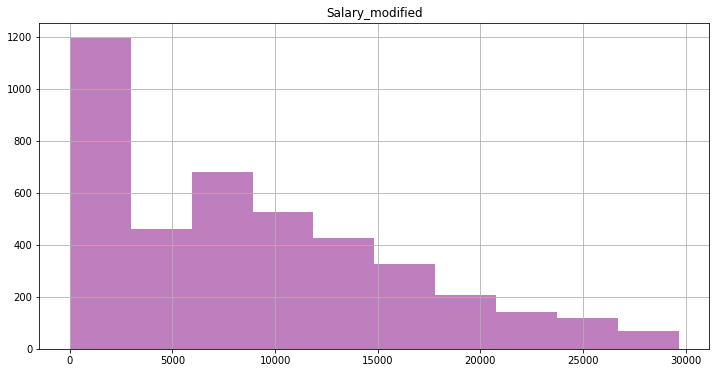

In [ ]:
ax = dados.query('Salary_modified <= 30000')[['Salary_modified']].hist(color = 'purple', alpha=0.5, bins=10, figsize=(12,6))